In [3]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation, DataService  # type: ignore
import numpy as np
import pandas as pd

In [4]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [5]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# ÂÆö‰πâÂõ†Â≠êÔºÅ

In [6]:
# def factor(df):
#     """
#     calculate_smart_money_original
    
#     ÂéüÂßãËÅ™ÊòéÈí±Âõ†Â≠ê (S = |R|/sqrt(V))
#     ËÆ°ÁÆóÊ≠•È™§:
#     1. ËÆ°ÁÆóÊØèÊ†πKÁ∫øÁöÑÂπ≥Âùá‰ª∑ÂíåÊ∂®Ë∑åÂπÖÁªùÂØπÂÄº
#     2. ÂõûÊ∫ØËøáÂéª10Â§©Ôºà960Ê†π15ÂàÜÈíüKÁ∫øÔºâÁöÑÊï∞ÊçÆ
#     3. ËÆ°ÁÆóÊØèÊ†πKÁ∫øÁöÑSÂÄº = |Ê∂®Ë∑åÂπÖ| / sqrt(Êàê‰∫§Èáè)
#     4. ÊåâSÂÄºÈôçÂ∫èÊéíÂ∫èÔºåÂèñÊàê‰∫§ÈáèÁ¥ØÁßØÂç†ÊØîÂâç20%ÁöÑKÁ∫ø
#     5. ËÆ°ÁÆóËÅ™ÊòéÈí±VWAPÂíåÊï¥‰ΩìVWAP
#     6. Âõ†Â≠êÂÄº = ËÅ™ÊòéÈí±VWAP / Êï¥‰ΩìVWAP
#     """
#     # ËÆ°ÁÆóÊØèÊ†πKÁ∫øÁöÑÂπ≥Âùá‰ª∑ÂíåÊ∂®Ë∑åÂπÖÁªùÂØπÂÄº
#     avg_price = (df['open'] + df['high'] + df['low'] + df['close']) / 4
#     abs_ret = abs((df['close'] - df['open']) / df['open'])
#     volume = df['volume']
    
#     # ÂàùÂßãÂåñÂõ†Â≠êÂÄº
#     factor_values = pd.Series(index=df.index, dtype=float)
#     window_size = 960  # 10Â§©ÁöÑ15ÂàÜÈíüKÁ∫øÊï∞ (10*24*4)
    
#     for i in range(window_size, len(df)):
#         # Ëé∑ÂèñÂõûÊ∫ØÁ™óÂè£Êï∞ÊçÆ
#         window = df.iloc[i-window_size:i-1]
#         window_avg_price = avg_price.iloc[i-window_size:i-1]
#         window_abs_ret = abs_ret.iloc[i-window_size:i-1]
#         window_volume = volume.iloc[i-window_size:i-1]
        
#         # ËÆ°ÁÆóSÂÄº
#         S = window_abs_ret / np.sqrt(window_volume)
        
#         # ÊåâSÂÄºÈôçÂ∫èÊéíÂ∫è
#         sorted_indices = S.sort_values(ascending=False).index
#         sorted_volume = window_volume.loc[sorted_indices]
#         sorted_avg_price = window_avg_price.loc[sorted_indices]
        
#         # ËÆ°ÁÆóÊàê‰∫§ÈáèÁ¥ØÁßØÂç†ÊØî
#         cum_volume = sorted_volume.cumsum()
#         total_volume = sorted_volume.sum()
#         threshold = total_volume * 0.2
#         smart_indices = cum_volume[cum_volume <= threshold].index
        
#         # ËÆ°ÁÆóËÅ™ÊòéÈí±VWAPÂíåÊï¥‰ΩìVWAP
#         if len(smart_indices) > 0:
#             smart_vwap = (sorted_avg_price.loc[smart_indices] * 
#                           sorted_volume.loc[smart_indices]).sum() / sorted_volume.loc[smart_indices].sum()
#         else:
#             smart_vwap = np.nan
        
#         all_vwap = (window_avg_price * window_volume).sum() / window_volume.sum()
        
#         # ËÆ°ÁÆóÂõ†Â≠êÂÄº
#         if not np.isnan(smart_vwap) and all_vwap != 0:
#             factor_values.iloc[i] = smart_vwap / all_vwap
#         else:
#             factor_values.iloc[i] = np.nan
            
#     return factor_values

In [ ]:
def factor(df, window_size = 960, threshold_value = 0.2):
    """
    ‰ºòÂåñÂêéÁöÑËÅ™ÊòéÈí±Âõ†Â≠êËÆ°ÁÆó (S = |R|/sqrt(V))
    ‰ºòÂåñÁÇπ:
    1. È¢ÑËÆ°ÁÆóÊâÄÊúâÂøÖË¶ÅÂàóÔºàÈÅøÂÖçÈáçÂ§çËÆ°ÁÆóÔºâ
    2. ‰ΩøÁî®ÊªöÂä®Á™óÂè£ÂêëÈáèÂåñÊìç‰Ωú
    3. ‰ΩøÁî®numpyÊõø‰ª£pandasËøõË°åÁ™óÂè£ÂÜÖËÆ°ÁÆó
    4. ÈÅøÂÖçÂú®Âæ™ÁéØ‰∏≠ÂàõÂª∫‰∏¥Êó∂Series
    """
    # È¢ÑËÆ°ÁÆóÊâÄÊúâÂøÖË¶ÅÂÄº
    avg_price = (df['open'] + df['high'] + df['low'] + df['close']) / 4
    avg_price_vals = avg_price.values
    
    abs_ret = abs((df['close'] - df['open']) / df['open'])
    
    volume = df['volume'].values
        
    # ÂàùÂßãÂåñÂõ†Â≠êÂÄºÊï∞ÁªÑ
    factor_values = np.full(len(df), np.nan)
    
    # È¢ÑËÆ°ÁÆóSÂÄº (|R|/sqrt(V))
    S_values = abs_ret.values / np.sqrt(volume)
    
    # ‰ΩøÁî®ÊªëÂä®Á™óÂè£ËÆ°ÁÆó
    for i in range(window_size, len(df)):
        # Ëé∑ÂèñÂΩìÂâçÁ™óÂè£ÂàáÁâáÁ¥¢Âºï
        start_idx = i - window_size
        end_idx = i - 1
        
        # ÊèêÂèñÂΩìÂâçÁ™óÂè£Êï∞ÊçÆ
        window_avg_price = avg_price_vals[start_idx:end_idx]
        window_volume = volume[start_idx:end_idx]
        window_S = S_values[start_idx:end_idx]
        
        # ÊåâSÂÄºÈôçÂ∫èÊéíÂ∫èÁöÑÁ¥¢Âºï
        sorted_idx = np.argsort(-window_S)
        sorted_volume = window_volume[sorted_idx]
        sorted_avg_price = window_avg_price[sorted_idx]
        
        # ËÆ°ÁÆóÁ¥ØÁßØÊàê‰∫§Èáè
        cum_volume = np.cumsum(sorted_volume)
        total_volume = cum_volume[-1]
        threshold = total_volume * threshold_value
        
        # ÊâæÂà∞ËÅ™ÊòéÈí±‰∫§ÊòìÁÇπ (Ââç20%Êàê‰∫§Èáè)
        smart_mask = cum_volume <= threshold
        if np.any(smart_mask):
            smart_vwap = np.sum(sorted_avg_price[smart_mask] * 
                               sorted_volume[smart_mask]) / np.sum(sorted_volume[smart_mask])
        else:
            smart_vwap = np.nan
        
        # ËÆ°ÁÆóÊï¥‰ΩìVWAP
        all_vwap = np.sum(window_avg_price * window_volume) / np.sum(window_volume)
        
        # ËÆ°ÁÆóÂõ†Â≠êÂÄº
        if not np.isnan(smart_vwap) and all_vwap != 0:
            factor_values[i] = smart_vwap / all_vwap
            
    return pd.Series(factor_values, index=df.index)

# ÊµãËØïÂõ†Â≠êË°®Áé∞


üìä ÂçïÂ∏ÅÁßç (single) ËØ¶ÁªÜËØÑ‰º∞ÁªìÊûú:
--------------------------------------------------
üîó Áõ∏ÂÖ≥ÊÄßÂàÜÊûê:
   IC (Pearson): 0.015930
   Rank_IC (Spearman): 0.018679
üìä ‰ø°ÊÅØÊØîÁéá:
   IR: 0.132837
   ÊúâÊïàÂàÜÁªÑÊï∞: 10
üìä Âõ†Â≠êÂàÜÂ∏É:
üìã Êï∞ÊçÆÊ¶ÇÂÜµ:
   Êï∞ÊçÆÈïøÂ∫¶: 130075
   Âõ†Â≠êÂàó: factor
   Êî∂ÁõäÁéáÂàó: future_return
   Êú™Êù•Êî∂ÁõäÂë®Êúü: 10
--------------------------------------------------

üñºÔ∏è  ÂçïÂ∏ÅÁßç (single) ÂõæÁâáÂ±ïÁ§∫:
----------------------------------------
üìä ÊòæÁ§∫ÂàÜÁªÑÂàÜÊûêÂõæ...


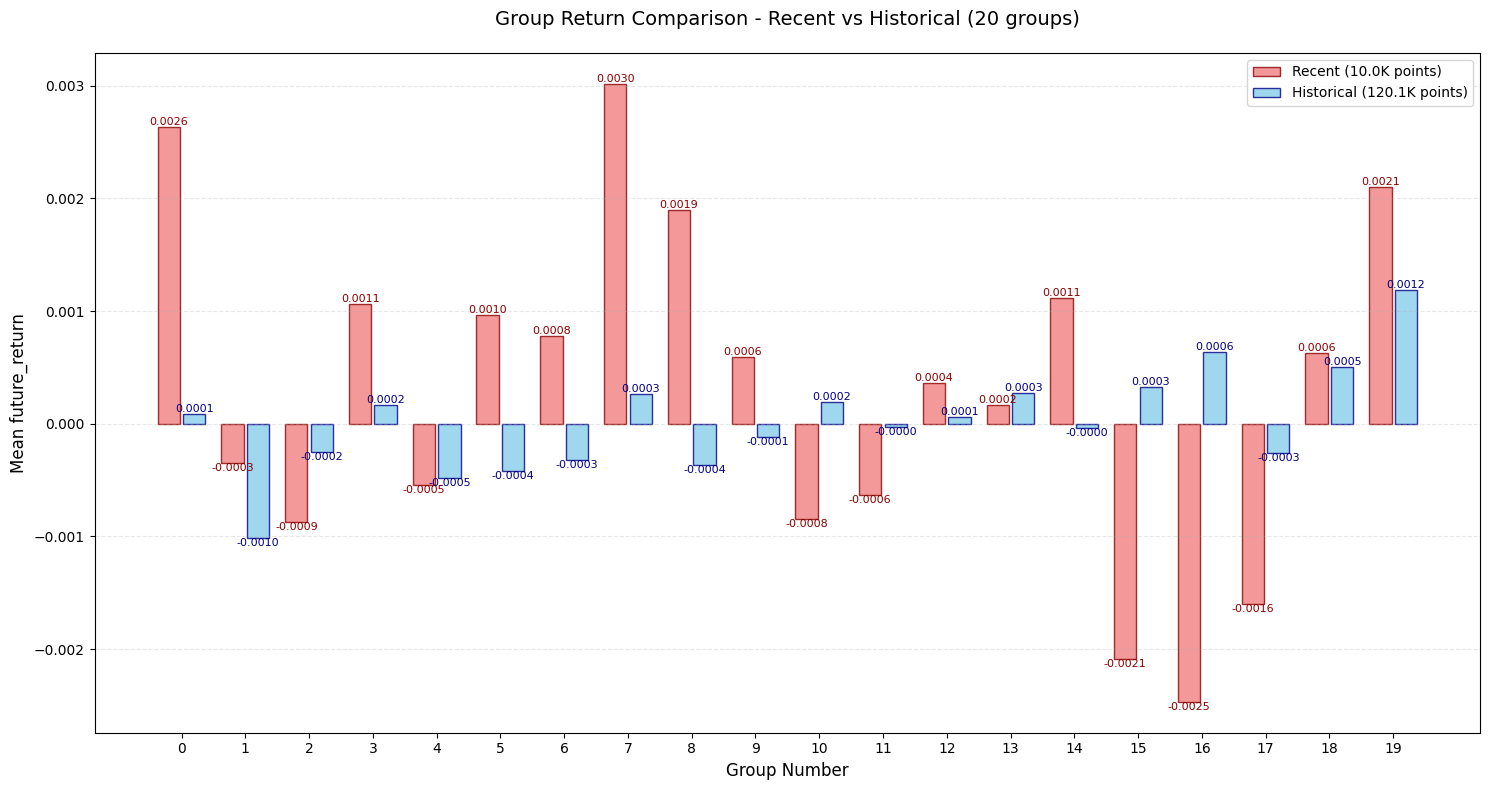

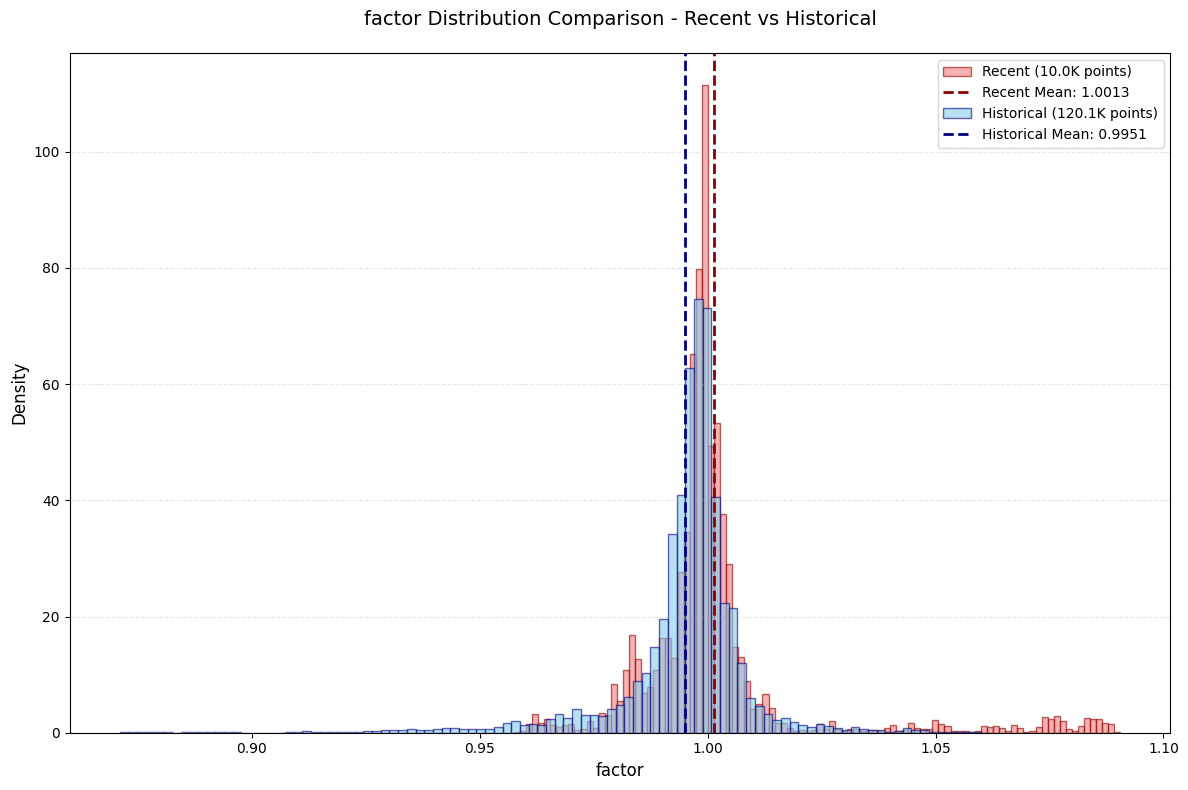

üìà ÊòæÁ§∫Âõ†Â≠êÂàÜÂ∏ÉÂõæ...
‚úÖ Â∑≤ÊòæÁ§∫ 2 ‰∏™ÂõæÁâá
----------------------------------------


In [8]:
evaluator.set_factor(
    factor_func=lambda df: factor(df),
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

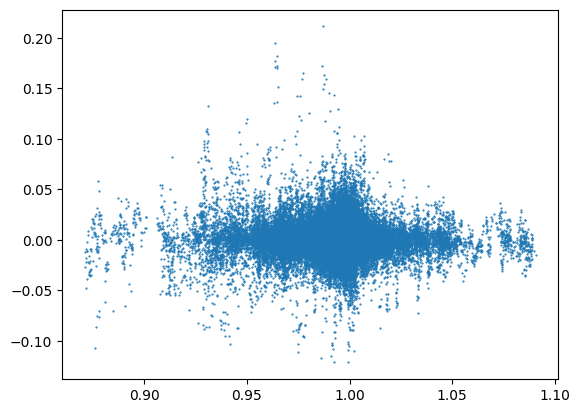

In [9]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [10]:
result['information_ratio']['group_correlations']
# ËøôË°®Á§∫‰∏çÂêåÂàÜÁªÑ‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßÔºåÈÄöÂ∏∏Áî®‰∫éËØÑ‰º∞Âõ†Â≠êÂú®‰∏çÂêåÂ∏ÇÂú∫Áä∂ÊÄÅ‰∏ãÁöÑË°®Áé∞‰∏ÄËá¥ÊÄß„ÄÇ
# Â¶ÇÊûúÁõ∏ÂÖ≥ÊÄßËæÉÈ´òÔºåËØ¥ÊòéÂõ†Â≠êÂú®‰∏çÂêåÂ∏ÇÂú∫Áä∂ÊÄÅ‰∏ãË°®Áé∞‰∏ÄËá¥ÔºõÂ¶ÇÊûúÁõ∏ÂÖ≥ÊÄßËæÉ‰ΩéÔºåËØ¥ÊòéÂõ†Â≠êÂú®‰∏çÂêåÂ∏ÇÂú∫Áä∂ÊÄÅ‰∏ãË°®Áé∞Â∑ÆÂºÇËæÉÂ§ß„ÄÇ

[-0.02733644700380926,
 0.01467593744585261,
 -0.014128831985440694,
 0.0021549282457908564,
 0.021166648796657347,
 0.0006689852564953507,
 0.03711894162695599,
 0.016018539641550547,
 -0.050928733386626436,
 0.0357265363038499]

In [11]:
print(result)

{'correlation_analysis': {'IC': 0.01593023148759539, 'Rank_IC': 0.018678867755691643}, 'information_ratio': {'IR': 0.13283690922613944, 'group_correlations': [-0.02733644700380926, 0.01467593744585261, -0.014128831985440694, 0.0021549282457908564, 0.021166648796657347, 0.0006689852564953507, 0.03711894162695599, 0.016018539641550547, -0.050928733386626436, 0.0357265363038499], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       0.8710   0.9701    0.9512       0.0002      0.0211   6504
1       0.9701   0.9829    0.9773      -0.0008      0.0150   6504
2       0.9829   0.9881    0.9857      -0.0004      0.0134   6504
3       0.9881   0.9910    0.9896       0.0001      0.0114   6503
4       0.9910   0.9926    0.9918      -0.0004      0.0118   6504
5       0.9926   0.9940    0.9933      -0.0005      0.0107   6504
6       0.9940   0.9952    0.9946       0